# Week 4 Lecture 1

## Determinants

We did examples of $2\times 2$ determinants in the theory lecture.  Let's take a look at an example of a larger determinant.

Consider the matrix $A = \begin{bmatrix}1 & 4 & -1\\ 3 & 2 & 0\\ -1 & 4 & 3 \end{bmatrix}$.  We can take the determinant by doing

In [ ]:
import numpy as np
import scipy.linalg as la

A = np.array([[1, 4, -1], [3, 2, 0], [-1, 4, 3]])
print(la.det(A))

-44.0


We can do this with another matrix $B = \begin{bmatrix} 2 & 4 & 6\\ 0 & 3 & 1\\ 0 & 0 & -5 \end{bmatrix}$

In [ ]:
B = np.array([[2, 4, 6], [0, 3, 1], [0, 0, -5]])
print(la.det(B))

-30.0


Notice that this is just the product of the diagonal.  In any triangular matrix the determinant will be the product of its diagonal.

## Eigenvalues and Eigenvectors

In the last lecture, we discussed a class of iterative methods for solving the system $A\mathbf{x} = \mathbf{b}$.  In particular, we found an equation for the error of our estimated solutions: 

$\mathbf{e}_k = M^k\mathbf{e}_0$.  

We saw before that this equation is straightforward if $M$ is just a number.  We would like to use a similar method with the matrix version, but to do so we need to know when and how we are allowed to treat matrix multiplication like scalar multiplication.  In particular, we would like to know when we are allowed to write 

$M\mathbf{x} = \lambda\mathbf{x},\hspace{1in}$ (1)

where $M$ is a matrix, $\mathbf{x}$ is a vector and $\lambda$ is a number.  

The notation here is a bit confusing.  We are ultimately interested in using the matrix $M$ from last lecture in equation (1), but the equation is perfectly valid for *any* square matrix $M$, not just that particular one.  In addition, the vector $\mathbf{x}$ in (1) has nothing to do with the solution to our original system $A\mathbf{x} = \mathbf{b}$.  You should think of equation (1) as follows: You are given some fixed matrix $M$ (it can be any square matrix - can you see why it has to be square?) and you are looking for a vector $\mathbf{x}$ and a number $\lambda$ such that multiplying $\mathbf{x}$ by $M$ is the same as multiplying $\mathbf{x}$ by the number $\lambda$.  Since $\mathbf{x} = \mathbf{0}$ (and any value of $\lambda$) is an obvious solution to this problem for any matrix $M$, we will only care about cases where $\mathbf{x} \neq \mathbf{0}$.  (It is still possible for $\lambda = 0$ even if $\mathbf{x} \neq \mathbf{0}$, and we are still interested in these solutions.)  

The number $\lambda$ in this equation is called an *eigenvalue* of $M$ and the vector $\mathbf{x}$ is called an *eigenvector* of $M$ corresponding to $\lambda$.  

Let's look at a few simple examples.  Let 

$M = \begin{pmatrix} 1 & 2 \\ 0 & 3 \end{pmatrix}$ and $\mathbf{x} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$.  

We have 

$M\mathbf{x} = \begin{pmatrix} 1 & 2 \\ 0 & 3 \end{pmatrix}\begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 3 \\ 3 \end{pmatrix} = 3\mathbf{x}$.  

This means that 3 is an eigenvalue of $M$ with corresponding eigenvector $[1, 1]^{T}$.  (Remember that the $T$ stands for transpose and just means "make this a column vector.")

Similarly, if we keep the same matrix $M$ but let 

$\mathbf{x} = \begin{pmatrix} 10 \\ 10 \end{pmatrix}$, 

then we have 

$M\mathbf{x} = \begin{pmatrix} 1 & 2 \\ 0 & 3 \end{pmatrix}\begin{pmatrix} 10 \\ 10 \end{pmatrix} = \begin{pmatrix} 30 \\ 30 \end{pmatrix} = 3\mathbf{x}$, 

so $[10, 10]^{T}$ is also an eigenvector corresponding to the eigenvalue 3.  In fact, it is easy to check that any multiple of $[1, 1]^{T}$ is also an eigenvector with corresponding eigenvalue 3.  

However, if we instead let 

$\mathbf{x} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$, 

then we have 

$M\mathbf{x} = \begin{pmatrix} 1 & 2 \\ 0 & 3 \end{pmatrix}\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 2 \\ 3 \end{pmatrix}$.  

This cannot possibly be written as $\lambda \mathbf{x}$ because any multiple of $\mathbf{x}$ would have a zero in the first entry.  That means that $[0, 1]^{T}$ is *not* an eigenvector of $M$.  

It turns out (and you should experiment until you are convinced that this is true) that most vectors are not eigenvectors of $M$.  The only possible eigenvectors are multiples of $[1, 1]^T$ and multiples of $[1, 0]^T$.  Moreover, there are only two eigenvalues of $M$.  We already saw that 3 is an eigenvalue of $M$ with corresponding eigenvectors that are multiples of $[1, 1]^T$.  It is also easy to check that 1 is an eigenvalue of $M$ with corresponding eigenvectors that are multiples of $[1, 0]^T$.  Notice that $M$ was a $2\times 2$ matrix and we found 2 eigenvalues, each with a family of corresponding eigenvectors.  (By "family", I mean that all the eigenvectors were multiples of each other.  The word I should really use is "subspace", but we won't go into the technical details of subspaces in this class.)  This pattern is not a coincidence.  It turns out (although we will not prove it) that *every* $n\times n$ matrix has $n$ eigenvalues, and almost every $n\times n$ matrix has $n$ different families of eigenvectors.  

There are a couple caveats about this theorem that are worth remembering.  First, the rule that there are $n$ eigenvalues of an $n\times n$ matrix works just like the rule that there are $n$ solutions to an $n$th degree polynomial, which you should already be familiar with from a basic algebra class.  In particular, it is possible for eigenvalues to be complex, and it is possible for the same eigenvalue to be repeated multiple times.  If one of the eigenvalues is complex, then its corresponding eigenvectors can also be written with complex entries.  If an eigenvalue is repeated $k$ times, then it will (almost always) have $k$ different families of eigenvectors.  It is actually possible for repeated eigenvalues to share the same family of eigenvectors (which is where the "almost" in our theorem comes from).  We won't worry about that issue in our class, because it is quite rare and makes the analysis much more complicated.  

The extra videos (available under "Additional Resources" in the canvas modules) show how to find eigenvalues and eigenvectors of a $2\times 2$ matrix by hand.  It is also possible to use that method for $3\times 3$ matrices (but it is much more difficult).  For anything larger than a $3\times 3$ matrix it is not usually possible to find eigenvalues/eigenvectors by hand.  Since we are primarily interested in large matrices, we will not worry about finding these values on paper.  Instead, we will let python do the hard work for us.  

In python, we can find the eigenvalues and eigenvectors of a matrix $M$ with the `eig` function, which is located in the `numpy.linalg` package.  The `eig` function takes a square matrix $M$ as an argument and returns two things: A 1D array containing all of the eigenvalues of $M$ and a matrix containing all of the eigenvectors of $M$.  For example, 

In [ ]:
import numpy as np

M = np.array([[1, 2], [0, 3]])
w, V = np.linalg.eig(M)

print(w)

[1. 3.]


In [ ]:
print(V)

[[1.         0.70710678]
 [0.         0.70710678]]


The array `w` is easy to interpret.  Each entry is an eigenvalue of $M$.  The matrix `V` is slightly more complicated.  Each column of V is an eigenvector of $M$, and the order of V matches the order of w.  That is, the first column of V is an eigenvector corresponding to the first entry of w and the second column of V is an eigenvector corresponding to the second entry of w.  In general, the column `V[;, i]` is an eigenvector corresponding to the eigenvalue `w[i]`.  (**Warning:** The syntax `V[:, i]` pulls out the entries from the `i`th column of V, but it makes a 1D array instead of a column vector.  If you want a column vector, then you will have to reshape this array.)

Python does not just use this format for V because it's a convenient way to store all of the eigenvectors; the matrix $V$ has some important mathematical significance.  Before we can see it, though, we need to rearrange the eigenvalues slightly.  Instead of storing the eigenvalues in a 1D array, it is often more mathematically useful to make a diagonal matrix with the eigenvalues along the main diagonal (and the rest of the entries zero).  This can be done in python with the `diag` function, which is part of the `numpy` package.  

In [ ]:
D = np.diag(w)
print(D)

[[1. 0.]
 [0. 3.]]


There is an important mathematical relationship between $M$, $V$ and $D$.  In particular, it turns out that we can rewrite $M$ as follows: 

$M = VDV^{-1}$.  

(We will verify this in python but not prove it.)  This formula is called an *eigendecomposition* of $M$.  You can check the formula in python with the code 

In [ ]:
print(M)

[[1 2]
 [0 3]]


In [ ]:
print(V @ D @ scipy.linalg.inv(V))

[[1. 2.]
 [0. 3.]]


Now lets look at the exmaple from the theory lecture.

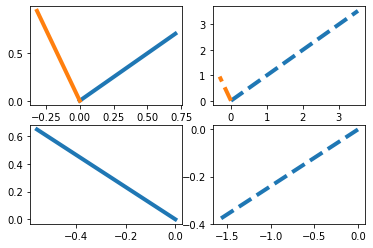

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[4, 1], [3, 2]])
w, V = np.linalg.eig (A)
v1 = V[:,0]
v2 = V[:,1]
v1_x = np.arange(0, v1[0] + v1[0]/100, v1[0]/100)
v1_y = np.arange(0, v1[1] + v1[1]/100, v1[1]/100)
v2_x = np.arange(0, v2[0] + v2[0]/100, v2[0]/100)
v2_y = np.arange(0, v2[1] + v2[1]/100, v2[1]/100)
plt.subplot(2,2,1)
plt.plot(v1_x, v1_y, linewidth = 4)
plt.plot(v2_x, v2_y, linewidth = 4)

v1 = A@v1
v2 = A@v2
v1_x = np.arange(0, v1[0] + v1[0]/100, v1[0]/100)
v1_y = np.arange(0, v1[1] + v1[1]/100, v1[1]/100)
v2_x = np.arange(0, v2[0] + v2[0]/100, v2[0]/100)
v2_y = np.arange(0, v2[1] + v2[1]/100, v2[1]/100)
plt.subplot(2,2,2)
plt.plot(v1_x, v1_y, linestyle = "--", linewidth = 4)
plt.plot(v2_x, v2_y, linestyle = "--", linewidth = 4)

v = np.random.randn(2,1)
v_x = np.arange(0, v[0] + v[0]/100, v[0]/100)
v_y = np.arange(0, v[1] + v[1]/100, v[1]/100)
plt.subplot(2,2,3)
plt.plot(v_x, v_y, linewidth = 4)

v = A@v
v_x = np.arange(0, v[0] + v[0]/100, v[0]/100)
v_y = np.arange(0, v[1] + v[1]/100, v[1]/100)
plt.subplot(2,2,4)
plt.plot(v_x, v_y, linestyle = "--", linewidth = 4)

## More about eigendecomposition

It is worth noting that the eigenvectors and eigenvalues of a matrix might be complex, so there might be lots of imaginary numbers on the right side of the above equation.  We won't worry about these complex numbers for two reasons: First, they all cancel out when you multiply $VDV^{-1}$, so there won't be any complex numbers in our final answers.  Second, we will ultimately only care about the magnitude of eigenvalues, so we will only really work with real numbers.  (Remember, the magnitude of a complex number $a + bi$ is $\sqrt{a^2 + b^2}$.  You can use the python command `np.abs()` to find the magnitude of a complex number.)

The eigendecomposition is particularly useful for computing powers of $M$.  To see this, notice that 

$M^2 = MM = \left(VDV^{-1}\right)\left(VDV^{-1}\right) = VDV^{-1}VDV^{-1} = VDDV^{-1} = VD^2V^{-1}$, 

because the innermost $V$ and $V^{-1}$ cancel out.  (It is important to remember that you cannot reorder matrix multiplication, so we are only allowed to cancel a $V^{-1}$ and $V$ if they appear beside each other.)

Similarly, 

$M^3 = M^2M = \left(VD^2V^{-1}\right)\left(VDV^{-1}\right) = VD^2V^{-1}VDV^{-1} = VD^2DV^{-1} = VD^3V^{-1}$.  

The pattern should quickly become apparent.  In general, we have 

$M^k = VD^kV^{-1}$.  

The reason this is so convenient is that $D$ is a diagonal matrix and it is easy to compute powers of a diagonal matrix: We just raise each entry of the matrix to the same power.  For example, 

$\left(\begin{array}{c} 2 & 0 \\ 0 & 1/3 \end{array}\right)^k = \left(\begin{array}{c} 2^k & 0 \\ 0 & (1/3)^k \end{array}\right)$.  